---

# <p style="padding:10px; background-color:#26344e; font-family:fantasy; font-weight:normal; color:#f2f2f0; font-size:150%; text-align:center; border-radius: 10px 10px">PLAYGROUND SERIES S3E9</p>

---

#### **DESCRIPTION:**
_The dataset for this competition (both train and test) was generated from a deep learning model trained on the [Concrete Strength Prediction dataset](https://www.kaggle.com/datasets/mchilamwar/predict-concrete-strength). Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance._

#### **TASK:**
_Predict the Strength of Concrete Based on its Characteristics._

---

<p style="font-family: verdana; font-weight: bold; font-size: 14px">Minimal setup.</p>


In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Indicates whether the notebook is running on Kaggle or not.
ON_KAGGLE = os.getenv("KAGGLE_KERNEL_RUN_TYPE") is not None
MODELS_PATH = Path("models")
MODELS_PATH.mkdir(exist_ok=True)  # If directory exists, do nothing.
DARK_BLUE = "#141b4d"

MY_RC = {
    "axes.labelcolor": DARK_BLUE,
    "axes.labelsize": 10,
    "axes.labelpad": 15,
    "axes.labelweight": "bold",
    "axes.titlesize": 14,
    "axes.titleweight": "bold",
    "axes.titlepad": 15,
    "xtick.labelsize": 10,
    "xtick.color": DARK_BLUE,
    "ytick.labelsize": 10,
    "ytick.color": DARK_BLUE,
    "figure.titlesize": 14,
    "figure.titleweight": "bold",
    "figure.dpi": 72,  # Locally Seaborn uses 72, meanwhile Kaggle 96.
    "font.size": 10,
    "font.family": "Serif",
    "text.color": DARK_BLUE,
}

sns.set_theme(rc=MY_RC)


---

# <p style="padding:10px; background-color:#26344e; font-family:fantasy; font-weight:normal; color:#f2f2f0; font-size:150%; text-align:center; border-radius: 10px 10px">QUICK LOOK AT DATASET</p>


---

In [72]:
orig_path = "data/ConcreteStrengthData.csv"
train_path = "data/train.csv"
test_path = "data/test.csv"

if ON_KAGGLE:
    orig_path = "/kaggle/input/predict-concrete-strength/ConcreteStrengthData.csv"
    train_path = "/kaggle/input/playground-series-s3e9/train.csv"
    test_path = "/kaggle/input/playground-series-s3e9/test.csv"

orig = pd.read_csv(orig_path)
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)


In [73]:
orig.shape, train.shape, test.shape

((1030, 9), (5407, 10), (3605, 9))

In [4]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5407 non-null   int64  
 1   CementComponent            5407 non-null   float64
 2   BlastFurnaceSlag           5407 non-null   float64
 3   FlyAshComponent            5407 non-null   float64
 4   WaterComponent             5407 non-null   float64
 5   SuperplasticizerComponent  5407 non-null   float64
 6   CoarseAggregateComponent   5407 non-null   float64
 7   FineAggregateComponent     5407 non-null   float64
 8   AgeInDays                  5407 non-null   int64  
 9   Strength                   5407 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 422.5 KB


**Features Description (source: [Feature descriptions and relationship with strength](https://www.kaggle.com/competitions/playground-series-s3e9/discussion/391067)):**

- **`CementComponent`**  
  Cement, as it is commonly known, is a mixture of compounds made by burning limestone and clay together at very high temperatures. Arguably the most important concrete property is compressive strength since compressive strength affects so many properties of concrete. Compressive strength often increases as cement content increases. While this may seem positive, past research has shown links between increased concrete strength and increased drying shrinkage and cracking density
- **`WaterComponent`**  
  Water is the key ingredient, which when mixed with cement, forms a paste that binds the aggregate together. The water causes the hardening of concrete through a process called hydration. Too much water reduces concrete strength, while too little will make the concrete unworkable. Thus, a careful balance of the cement-to-water ratio is required when making concrete. The concrete strength is inversely proportional to the w/c (water-cement ratio).
- **`BlastFurnaceComponent`**  
  Blast furnace slag cement is the mixture of ordinary Portland cement and finely granulated blast furnace slag obtained as a by-product in the manufacture of steel with a percent under 70% to that of cement. The initial strength achieved is lesser than that of conventional concrete, but the higher ultimate strength gained is equal to and sometimes higher than conventional concrete.
- **`FlyAshComponent`**  
  Fly ash use in concrete improves the workability of plastic concrete and the strength and durability of hardened concrete. Fly ash use is also cost-effective. When fly ash is added to concrete, the amount of portland cement may be reduced.
- **`SuperplasticizerComponent`**  
  Plasticizers reduce the amount of water required to ensure the complete hydration of cement and proper workability of concrete. Hence, strength increases.
- **`CoarseAggregateComponent`** and **`FineAggregateComponent`**  
  Aggregate is the solid particles that are bound together by the cement paste to create the synthetic rock known as concrete. Aggregates can be fine, such as sand, or coarse, such as gravel. The relative amounts of each type and the sizes of each type of aggregate determine the physical properties of the concrete.
- **`AgeInDays`**  
   Concrete is usually dry enough after 24 to 48 hours to walk on. For concrete to dry and reach its full strength, it typically takes about 28 days per inch of slab thickness.
- **`Strength`**  
   The final strength of concrete. **TARGET**.

In [5]:
train.head()


,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19


In [6]:
train.describe().T


,count,mean,std,min,25%,50%,75%,max
id,5407.0,2703.000000,1561.010784,0.00,1351.50,2703.00,4054.50,5406.0
CementComponent,5407.0,299.168189,105.537682,102.00,213.70,297.20,375.00,540.0
BlastFurnaceSlag,5407.0,58.610579,83.417801,0.00,0.00,0.00,122.60,359.4
FlyAshComponent,5407.0,31.872795,54.605003,0.00,0.00,0.00,79.00,200.1
WaterComponent,5407.0,185.076235,18.517583,121.80,175.10,187.40,192.00,247.0
SuperplasticizerComponent,5407.0,4.108441,5.692296,0.00,0.00,0.00,8.05,32.2
CoarseAggregateComponent,5407.0,992.000718,77.148010,801.00,938.20,978.00,1047.00,1145.0
FineAggregateComponent,5407.0,771.219974,78.725253,594.00,734.30,781.20,821.00,992.6
AgeInDays,5407.0,51.751618,70.006975,1.00,7.00,28.00,56.00,365.0
Strength,5407.0,35.452071,16.401896,2.33,23.64,33.95,45.85,82.6


In [7]:
assert np.all(orig.isna().sum() == 0)
assert np.all(train.isna().sum() == 0)
assert np.all(test.isna().sum() == 0)


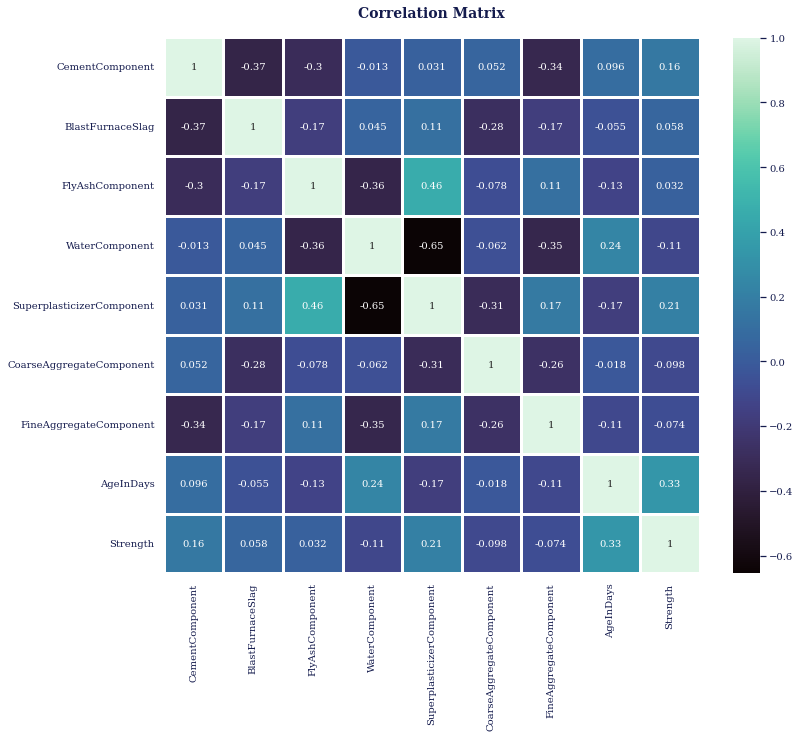

In [8]:
plt.figure(figsize=(12, 12))
sns.heatmap(
    train.drop("id", axis=1).corr(),
    linecolor="white",
    linewidth=3,
    annot=True,
    square=True,
    cbar_kws={"shrink": 0.82},
    cmap="mako",
)
plt.title("Correlation Matrix", pad=20)
plt.show()


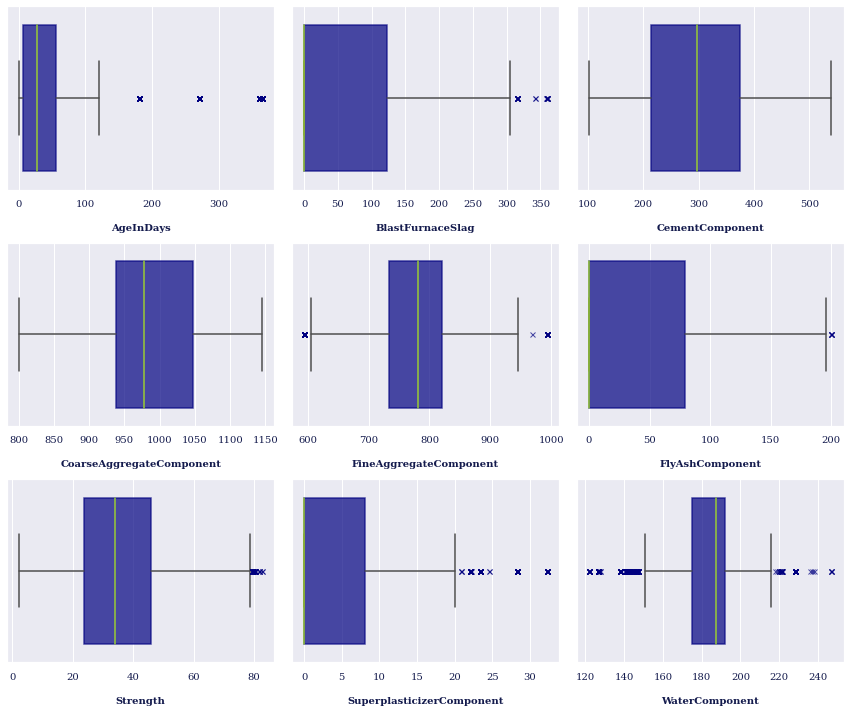

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10), tight_layout=True)

medianprps = {"color": "yellowgreen"}
boxprps = {"alpha": 0.7, "color": "navy"}
flierprps = {"marker": "x", "mec": "navy", "mfc": "navy", "alpha": 0.7}

for idx, (col, ax) in enumerate(zip(train.columns.difference(["id"]), axes.ravel())):
    sns.boxplot(data=train, x=col, ax=ax, flierprops=flierprps, medianprops=medianprps, 
                boxprops=boxprps)
    
plt.show()


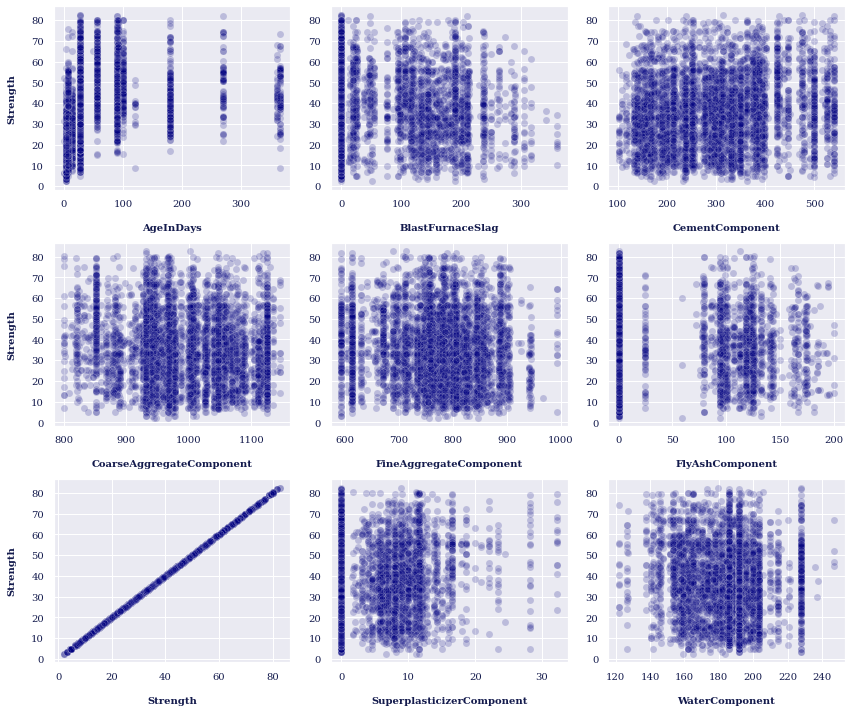

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10), tight_layout=True)

for idx, (col, ax) in enumerate(zip(train.columns.difference(["id"]), axes.ravel())):
    sns.scatterplot(data=train, x=col, y="Strength", ax=ax, s=50, alpha=0.2, color="navy")
    if not idx in (0, 3, 6):
        plt.sca(ax)
        plt.ylabel("")
        
plt.show()

In [11]:
train["AgeInDays"].value_counts().sort_index()


1         5
3       639
7       796
14      249
28     2097
49        1
56      313
90      540
91       73
100     212
120      15
180     264
270      75
360      37
365      91
Name: AgeInDays, dtype: int64

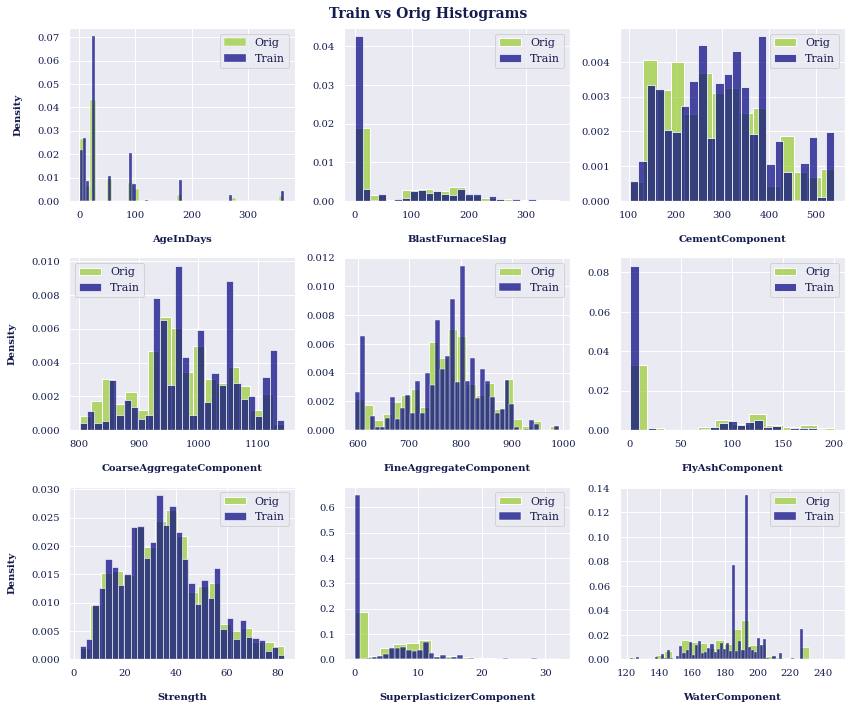

In [12]:
orig.columns = orig.columns.str.replace(" ", "")
train.columns = train.columns.str.replace(" ", "")
assert set(orig.columns) == set(train.columns.difference(["id"]))

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10), tight_layout=True)
plt.suptitle("Train vs Orig Histograms")

for idx, (col, ax) in enumerate(zip(train.columns.difference(["id"]), axes.ravel())):
    sns.histplot(data=orig, x=col, stat="density", color="yellowgreen", alpha=0.7, ax=ax, label="Orig")
    sns.histplot(data=train, x=col, stat="density", color="navy", alpha=0.7, ax=ax, label="Train")
    plt.sca(ax)
    plt.legend()
    if not idx in (0, 3, 6):
        plt.ylabel("")
        
plt.show()


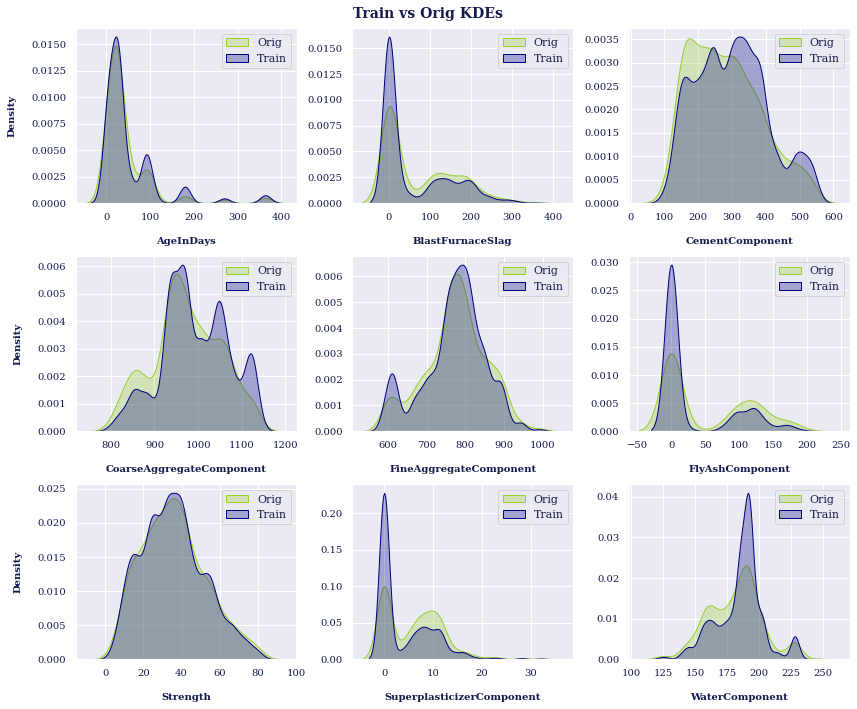

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10), tight_layout=True)
plt.suptitle("Train vs Orig KDEs")

for idx, (col, ax) in enumerate(zip(train.columns.difference(["id"]), axes.ravel())):
    sns.kdeplot(data=orig, x=col, fill=True, color="yellowgreen", alpha=0.3, ax=ax, label="Orig")
    sns.kdeplot(data=train, x=col, fill=True, color="navy", alpha=0.3, ax=ax, label="Train")
    plt.sca(ax)
    plt.legend()
    if not idx in (0, 3, 6):
        plt.ylabel("")

plt.show()


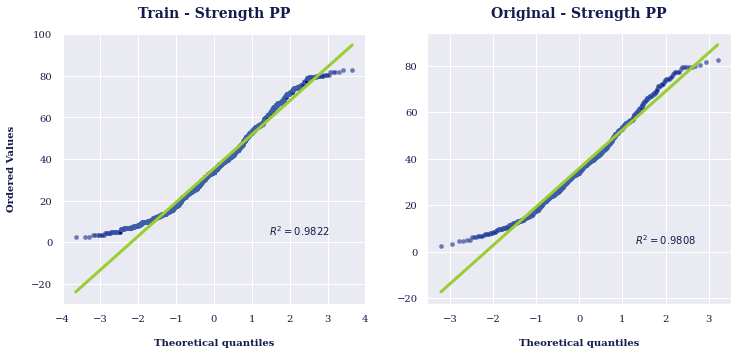

In [14]:
from scipy.stats import probplot

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

probplot(train["Strength"], plot=ax1, rvalue=True)
plt.sca(ax1)
plt.title("Train - Strength PP")

probplot(orig["Strength"], plot=ax2, rvalue=True)
plt.sca(ax2)
plt.ylabel("")
plt.title("Original - Strength PP")

for ax in (ax1, ax2):
    ax.get_lines()[0].set_markerfacecolor("navy")
    ax.get_lines()[0].set_markersize(4.0)
    ax.get_lines()[0].set_alpha(0.5)
    ax.get_lines()[1].set_linewidth(3.0)
    ax.get_lines()[1].set_color("yellowgreen")

plt.show()


In [15]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor


mutual_info = mutual_info_regression(
    train.drop(["Strength", "id"], axis=1), train["Strength"]
)
mutual_info = mutual_info / np.sum(mutual_info)

forest = RandomForestRegressor(random_state=42)
forest.fit(train.drop(["Strength", "id"], axis=1), train["Strength"])

importances = pd.DataFrame(
    [forest.feature_importances_, mutual_info],
    columns=forest.feature_names_in_,
    index=["RandomForestRegressor", "Mutual Information"],
).T.sort_values(by="RandomForestRegressor", ascending=False)

importances


,RandomForestRegressor,Mutual Information
AgeInDays,0.471208,0.572220
CementComponent,0.111051,0.077484
SuperplasticizerComponent,0.097125,0.054212
FineAggregateComponent,0.085742,0.070397
CoarseAggregateComponent,0.084749,0.075880
WaterComponent,0.075773,0.061841
BlastFurnaceSlag,0.042277,0.061986
FlyAshComponent,0.032076,0.025980


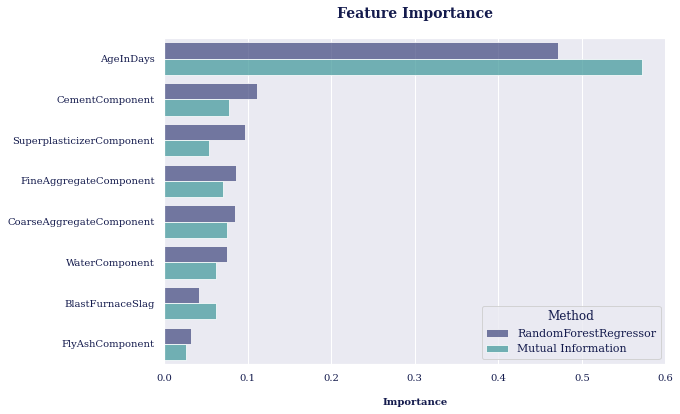

In [16]:
melted = importances.melt(
    var_name="Method", value_name="Importance", ignore_index=False
)

plt.figure(figsize=(9, 6))
ax = sns.barplot(
    data=melted,
    x="Importance",
    y=melted.index,
    hue="Method",
    palette="mako",
    alpha=0.75,
)
plt.title("Feature Importance", pad=20)
plt.show()


<blockquote style="margin-right:auto; margin-left:auto; background-color:#26344e; padding: 10px; margin:2px; border-radius: 10px 10px">
    <b><span style="color:#f2f2f0;font-size:16px;font-family:verdana;">Basic EDA Summary 📈:</span></b>
    <ul style="color:#f2f2f0;">
        <li> The dataset is relatively small, consisting of thousands of samples.</li>
        <li> There are no <b>NULL</b> values present in the dataset, and therefore, no imputation is necessary.</li>
        <li> The dataset only includes eight numerical features, which typically do not require encoding.</li>
        <li> The features are practically independent of each other and show little linear dependency.</li>
        <li> The variable with the highest correlation to the target is <b>AgeInDays (~0.33)</b>.</li>
        <li> The dataset has many repeated values across features.</li>
        <li> The <b>AgeInDays</b> variable is discretized, with several unique values obtained at specified intervals.</li>
        <li> Three features in the dataset, namely <b>BlastFurnaceSlag</b>, <b>FlyAshComponent</b>, and <b>SuperplasticizerComponent</b>, contain predominantly zero values. To handle this, we encode these features using a Binarizer.</li>
        <li> The dataset lacks significant outliers that may impact the analysis.</li>
        <li> The distribution of the training dataset is similar to the original dataset, indicating that they can be merged.</li>
        <li> The target coefficient of determination is approximately 0.98. A square root transformation marginally increases it to ~0.99 but does not improve ML performance.</li>
        <li> Basic feature importance measures using the RandomForestRegressor and mutual_info_regression models indicate that <b>AgeInDays</b> is the most important feature, with a score of ~0.47 and ~0.57, respectively. The remaining features score ~0.10 or less.</li>
    </ul>
    <b><span style="color:#f2f2f0;font-size:16px;font-family:verdana;">Proposal on what to do with this stuff 🕵:</span></b>  
    <ul style="color:#f2f2f0;">
        <li><b>CementComponent</b> - StandardScaler.</li>
        <li><b>WaterComponent</b> - StandardScaler.</li>
        <li><b>CoarseAggregateComponent</b> - StandardScaler.</li>
        <li><b>FineAggregateComponent</b> - StandardScaler.</li>
        <li><b>AgeInDays</b> - MinMaxScaler.</li>
        <li><b>BlastFurnaceSlag</b> - Binarizer.</li>
        <li><b>FlyAshComponent</b> - Binarizer.</li>
        <li><b>SuperplasticizerComponent</b> - Binarizer.</li>
        <li><b>Strength</b> - Nothing.</li>
    </ul>
</blockquote>

---

# <p style="padding:10px; background-color:#26344e; font-family:fantasy; font-weight:normal; color:#f2f2f0; font-size:150%; text-align:center; border-radius: 10px 10px">MACHINE LEARNING</p>

---

In [74]:
orig.columns = orig.columns.str.replace(" ", "")
train.columns = train.columns.str.replace(" ", "")
test.columns = test.columns.str.replace(" ", "")

all_feats = [
    "CementComponent",
    "WaterComponent",
    "CoarseAggregateComponent",
    "FineAggregateComponent",
    "AgeInDays",
    "BlastFurnaceSlag",
    "FlyAshComponent",
    "SuperplasticizerComponent",
]

mean_train = pd.DataFrame(train.groupby(all_feats)["Strength"].mean()).reset_index()
train_extended = pd.concat([mean_train, orig], ignore_index=True).drop_duplicates()
train_extended.shape

(4011, 9)

In [75]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split


preprocess = make_column_transformer(
    (
        RobustScaler(),
        [
            "CementComponent",
            "WaterComponent",
            "CoarseAggregateComponent",
            "FineAggregateComponent",
        ],
    ),
    (
        MinMaxScaler(),
        [
            "AgeInDays",
        ],
    ),
    (
        Binarizer(),
        [
            "BlastFurnaceSlag",
            "FlyAshComponent",
            "SuperplasticizerComponent",
        ],
    ),
)

X_train_full = preprocess.fit_transform(train_extended)
y_train_full = train_extended["Strength"].values

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

X_test = preprocess.transform(test)


In [77]:
import warnings

from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold 
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.base import clone

from lightgbm import LGBMRegressor
from lightgbm import early_stopping
from catboost import CatBoostRegressor

from optuna.distributions import FloatDistribution as FloatDist
from optuna.distributions import IntDistribution as IntDist
from optuna.distributions import CategoricalDistribution as CatDist
from optuna.integration import OptunaSearchCV
from optuna.exceptions import ExperimentalWarning
from optuna import logging


logging.set_verbosity(logging.WARNING)
warnings.filterwarnings("ignore", category=ExperimentalWarning)

PATIENCE = 20


In [78]:
gbr = GradientBoostingRegressor(
    validation_fraction=0.2, random_state=151, n_iter_no_change=PATIENCE
)
gbr_space = {
    "learning_rate": FloatDist(5e-4, 5e-1, log=True),
    "n_estimators": IntDist(100, 1000, step=50),
    "subsample": FloatDist(0.75, 0.95),
    "criterion": CatDist(["friedman_mse", "squared_error"]),
    "min_samples_split": IntDist(5, 50, log=True),
    "min_samples_leaf": IntDist(5, 50, log=True),
    "min_weight_fraction_leaf": FloatDist(1e-3, 1e-1, log=True),
    "max_depth": IntDist(2, 5),
    "min_impurity_decrease": FloatDist(1e-5, 1e-1, log=True),
    "max_features": CatDist(["sqrt", "log2", 1.0]),
    "max_leaf_nodes": IntDist(200, 2000, log=True),
    "tol": FloatDist(1e-3, 1e-1, log=True),
}
gbr_opt = OptunaSearchCV(
    estimator=gbr,
    param_distributions=gbr_space,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    n_trials=100,
    n_jobs=-1,
    verbose=0,
    scoring="neg_root_mean_squared_error",
    error_score="raise",
    random_state=42,
)
gbr_opt.fit(X_train_full, y_train_full)

print("Name:".ljust(25), gbr_opt.best_estimator_.__class__.__name__)
print("Best Score:".ljust(25), f"{-gbr_opt.best_score_:.6f}")
for param, value in gbr_opt.best_params_.items():
    if isinstance(value, float):
        value = f"{value:.6f}"
    print(f"{param}:".ljust(25), value)


Name:                     GradientBoostingRegressor
Best Score:               11.179067
learning_rate:            0.030945
n_estimators:             1000
subsample:                0.780245
criterion:                friedman_mse
min_samples_split:        31
min_samples_leaf:         11
min_weight_fraction_leaf: 0.050683
max_depth:                5
min_impurity_decrease:    0.000026
max_features:             log2
max_leaf_nodes:           428
tol:                      0.001029


In [79]:
lgbm = LGBMRegressor(random_state=151) #, objective="huber")
lgbm_space = {
    "num_leaves": IntDist(4, 16),
    "max_depth": IntDist(2, 10),
    "learning_rate": FloatDist(5e-4, 5e-1, log=True),
    "n_estimators": IntDist(100, 1500, step=100),
    "min_split_gain": FloatDist(1e-4, 1e-1, log=True),
    "min_child_weight": FloatDist(1e-3, 1e-1, log=True),
    "min_child_samples": IntDist(10, 200, step=10),
    "subsample": FloatDist(0.75, 0.95),
    "colsample_bytree": FloatDist(0.75, 0.95),
    "importance_type": CatDist(["split", "gain"]),
    "reg_alpha": FloatDist(1e-1, 1e3, log=True),
    "reg_lambda": FloatDist(1e-1, 1e3, log=True),
    # "alpha": FloatDist(0.5, 5),
}
lgbm_opt = OptunaSearchCV(
    estimator=lgbm,
    param_distributions=lgbm_space,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    n_trials=250,
    n_jobs=-1,
    verbose=0,
    scoring="neg_root_mean_squared_error",
    error_score="raise",
    random_state=42,
)
lgbm_opt.fit(
    X_train,
    y_train,
    eval_set=[(X_valid, y_valid)],
    callbacks=[early_stopping(stopping_rounds=PATIENCE, verbose=False)],
)

print("Name:".ljust(25), lgbm_opt.best_estimator_.__class__.__name__)
print("Best Score:".ljust(25), f"{-lgbm_opt.best_score_:.6f}")
for param, value in lgbm_opt.best_params_.items():
    if isinstance(value, float):
        value = f"{value:.6f}"
    print(f"{param}:".ljust(25), value)


Name:                     LGBMRegressor
Best Score:               11.096732
num_leaves:               9
max_depth:                2
learning_rate:            0.229146
n_estimators:             400
min_split_gain:           0.038636
min_child_weight:         0.002174
min_child_samples:        20
subsample:                0.863434
colsample_bytree:         0.875977
importance_type:          split
reg_alpha:                1.122628
reg_lambda:               2.780136


In [80]:
from scipy.stats import reciprocal

cbr = CatBoostRegressor(
    allow_writing_files=False,
    silent=True,
    random_seed=151,
)
# loss = "Huber:delta="
# deltas = reciprocal(0.5, 5).rvs(20)
cbr_space = {
    # "loss_function": CatDist([f"{loss}{delta}" for delta in deltas]),
    "n_estimators": IntDist(100, 1500, step=100),
    "learning_rate": FloatDist(5e-4, 5e-1, log=True),
    "max_depth": IntDist(2, 10),
    "reg_lambda": FloatDist(1e-1, 1e3, log=True),
    "colsample_bylevel": FloatDist(1e-2, 9e-1, log=True),
    "subsample": FloatDist(0.75, 0.95),
    "min_child_samples": IntDist(10, 200, step=5),
}
cbr_opt = OptunaSearchCV(
    estimator=cbr,
    param_distributions=cbr_space,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    n_trials=150,
    n_jobs=-1,
    verbose=0,
    scoring="neg_root_mean_squared_error",
    error_score="raise",
    random_state=42,
)
cbr_opt.fit(
    X_train,
    y_train,
    eval_set=(X_valid, y_valid),
    early_stopping_rounds=PATIENCE,
)

print("Name:".ljust(25), cbr_opt.best_estimator_.__class__.__name__)
print("Best Score:".ljust(25), f"{-cbr_opt.best_score_:.6f}")
for param, value in cbr_opt.best_params_.items():
    if isinstance(value, float):
        value = f"{value:.6f}"
    print(f"{param}:".ljust(25), value)


Name:                     CatBoostRegressor
Best Score:               11.062050
n_estimators:             1200
learning_rate:            0.049865
max_depth:                4
reg_lambda:               103.655164
colsample_bylevel:        0.441132
subsample:                0.750215
min_child_samples:        190


In [82]:
best_gbr = clone(gbr_opt.best_estimator_)
best_lgbm = clone(lgbm_opt.best_estimator_)
best_cbr = clone(cbr_opt.best_estimator_)

gbr_results, lgbm_results, cbr_results = [], [], []

rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)
for train_ids, valid_ids in rkf.split(X_train_full, y_train_full):
    X_train, X_valid = X_train_full[train_ids], X_train_full[valid_ids]
    y_train, y_valid = y_train_full[train_ids], y_train_full[valid_ids]

    best_gbr.fit(
        X_train,
        y_train,
    )
    gbr_results.append(best_gbr.predict(X_test))

    best_lgbm.fit(
        X_train,
        y_train,
        eval_set=(X_valid, y_valid),
        callbacks=[early_stopping(stopping_rounds=PATIENCE, verbose=False)],
    )
    lgbm_results.append(best_lgbm.predict(X_test))

    best_cbr.fit(
        X_train,
        y_train,
        eval_set=(X_valid, y_valid),
        early_stopping_rounds=PATIENCE,
    )
    cbr_results.append(best_cbr.predict(X_test))

test_results = np.r_[gbr_results, lgbm_results, cbr_results].mean(axis=0)


In [84]:
submission = pd.DataFrame(
    {
        "id": test["id"],
        "Strength": test_results,
    }
).set_index("id")

submission.to_csv("submission.csv")
submission.head()

,Strength
id,
5407,48.935567
5408,19.971528
5409,31.473597
5410,46.034916
5411,33.055998


---